# IMAGE CLASSIFICATION WITH CONVOLUTIONAL NEURAL NETWORK USING CIFAR-10 dataset 

In [24]:
#import the required libraries
import tensorflow as tf
import datetime
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset

The given dataset has 60000 images with 10 categories.  80% dataset is used for training and 20% is used for validation

In [59]:
(X_train, y_train), (X_test,y_test) = .load_data()
X_train.shape

(50000, 32, 32, 3)

Above is the shape of training set of 32 x 32 image with 3 rgb channels.

In [63]:
X_test.shape

(10000, 32, 32, 3)

Above is the shape of tesing set of 32 x 32 image with 3 rgb channels.

In [62]:
y_train.shape

(50000, 1)

In [64]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

The given training set has 2D arrays but 1D arrays will be more easier. So I converted it into 1D array.

In [65]:
y_train = y_train.reshape(-1,) # To reshape the 2D array into 1D, use -1 in first parameter to convert and blank in second paramter because we don't need  [6] , we need only the number 6
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [66]:
y_test = y_test.reshape(-1,)

In [70]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"] #name the images 

In [32]:
def plot_sample(X, y, index):  #defining function for future use and code simplification
    plt.figure(figsize = (15,2)) # tuple of width and height 
    plt.imshow(X[index]) #displays the grayscale image 
    plt.xlabel(classes[y[index]]) #labelling X axis

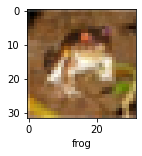

In [67]:
plot_sample(X_train,y_train,0)

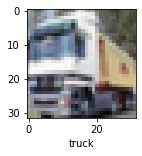

In [141]:
plot_sample(X_train,y_train,1)

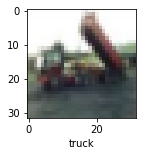

In [38]:
plot_sample(X_train,y_train,2)

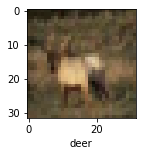

In [35]:
plot_sample(X_train,y_train,3)

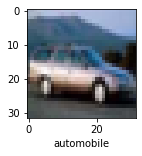

In [36]:
plot_sample(X_train,y_train,4)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [39]:
#Normalizing training and testing data
X_train=X_train/255.0
X_test=X_test/255.0

# 5-layer CONVOLUTIONAL NEURAL NET

1) Sequential model- The common architecture of ConvNets is a sequential architecture.
2) Conv2D- 2D Convolution Layer which creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.
3) MaxPooling2D- pooling operation that calculates the maximum, or largest, value in each patch of each feature map.
4) Flatten - flattens the input
5) Dense -  regular deeply connected neural network layer and does the below operation on the input and return the output.

In [40]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

'''rectified linear activation function or ReLu is a piecewise linear function that will output the input directly
if it is positive, otherwise, it will output zero. There will be no negative values as it converts all negative values 
into zero which is more helpful. It won't cause problems occurring with vanishing gradients. '''

"rectified linear activation function or ReLu is a piecewise linear function that will output the input directly\nif it is positive, otherwise, it will output zero. There will be no negative values as it converts all negative values \ninto zero which is more helpful. It won't cause problems occurring with vanishing gradients. "

In [41]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

#adam - efficient algorithm for optimization technique, for gradient descent
#sparse_categorical_crossentropy-Computes the crossentropy loss between the labels and predictions

# Visualizing the training loss, validation loss, training accuracy and validation accuracy using tensorboard 

In [42]:

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [43]:
cnn.fit(X_train,y_train,epochs=10,validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/10
1563/1563 [==============================] - 186s 113ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 177s 113ms/step - loss: 2.3028 - accuracy: 0.0995 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 175s 112ms/step - loss: 2.3028 - accuracy: 0.0966 - val_loss: 2.3026 - val_accuracy: 0.1000 ETA: 2s - loss: 2.3028 - accuracy: 0.09 -
Epoch 4/10
1563/1563 [==============================] - 161s 103ms/step - loss: 2.3028 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 174s 112ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 198s 127ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 176s 113ms/ste

In [48]:
%load_ext tensorboard
%tensorboard --logdir logs/fit


Reusing TensorBoard on port 6006 (pid 11692), started 0:58:30 ago. (Use '!kill 11692' to kill it.)

100 Images in 10 x 10 grid fashion

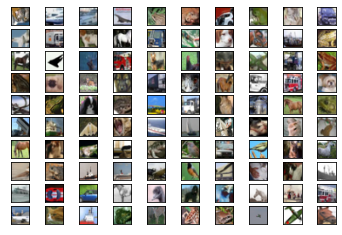

In [138]:
for i in range(100):
    
    
    plt.subplot(10,10,i+1) # define subplot
    plt.imshow(X_test[i]) # plot raw pixel data
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    
plt.show() # show the figure